In [ ]:
!pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 6.5 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=d43e7b97112d6d209efb60664a6339d183c6787d29812a2ee89599097e1adb20
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.4 MB/s eta 0:00:00


In [ ]:
!pip install leidenalg
!pip install louvain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.4 MB/s eta 0:00:00


Number of genes in adata: 12303
Number of gene names loaded: 12304


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


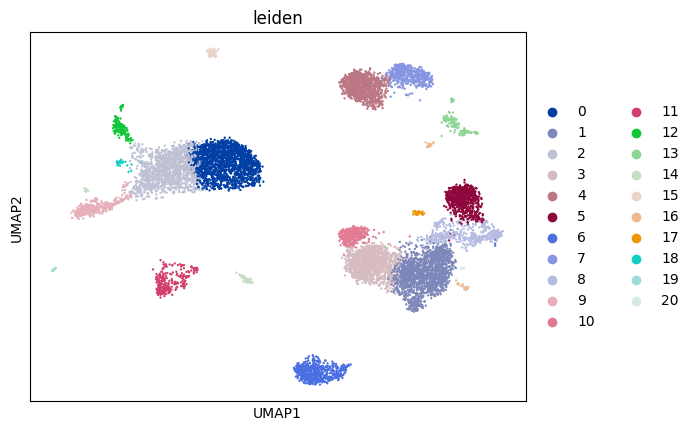

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

Cluster 0:
Top marker genes: 775, 3419, 873, 6229, 776, 774, 10669, 7861, 11394, 3574
Cluster 1:
Top marker genes: 9172, 6909, 3278, 3947, 6908, 7608, 6910, 8460, 671, 2221
Cluster 2:
Top marker genes: 10669, 6229, 4668, 4539, 873, 11394, 12179, 7193, 3950, 6536
Cluster 3:
Top marker genes: 794, 4320, 8460, 5855, 9626, 11468, 11018, 4011, 12091, 10863
Cluster 4:
Top marker genes: 11514, 6541, 10227, 3988, 4002, 3623, 3986, 8674, 4003, 3989
Cluster 5:
Top marker genes: 7542, 11714, 9172, 3312, 9952, 3311, 3278, 7539, 6665, 10670
Cluster 6:
Top marker genes: 1569, 11714, 6665, 7556, 7186, 3312, 10670, 7546, 2954, 10395
Cluster 7:
Top marker genes: 11514, 6541, 4002, 4003, 3986, 3623, 3988, 3060, 3989, 10227
Cluster 8:
Top marker genes: 9952, 9172, 6909, 11714, 6908, 6665, 1579, 11393, 10899, 10670
Cluster 9:
Top marker genes: 3948, 3950, 917, 10669, 11394, 910, 7193, 8668, 9589, 5590
Cluster 10:
Top marker genes: 11468, 4320, 8460, 11878, 5855, 1580, 6778, 10863, 9626, 4011
Cluster 11:
T

In [68]:


import scanpy as sc
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset
adata = sc.read('dataset.h5ad')

# Load gene names
gene_names_df = pd.read_csv('gene_names.csv', header=None)
gene_names = gene_names_df[0].tolist()

# Check dimensions
print("Number of genes in adata:", len(adata.var_names))
print("Number of gene names loaded:", len(gene_names))

# Ensure gene names match the number of genes in adata
if len(gene_names) > len(adata.var_names):
    gene_names = gene_names[:len(adata.var_names)]

# Create a mapping of gene names to adata.var
if len(gene_names) == len(adata.var_names):
    adata.var['gene_names'] = gene_names
else:
    print("Warning: Gene names list length does not match dataset length. Check the data.")

# Quality Control (QC)
sc.pp.calculate_qc_metrics(adata, inplace=True)

# Filter cells with more than 200 genes and less than 25000 total counts
adata = adata[adata.obs['n_genes_by_counts'] > 200, :]
adata = adata[adata.obs['total_counts'] < 25000, :]

# Normalization
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Feature Selection
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var.highly_variable]

# PCA
sc.pp.pca(adata, n_comps=50)
sc.pp.neighbors(adata)

# Clustering using Leiden Method
sc.tl.leiden(adata, resolution=1.0)  # Adjust resolution parameter as needed

# Calculate UMAP representation
sc.tl.umap(adata)

# Visualization of Clusters
sc.pl.umap(adata, color=['leiden'])

# Differential Expression Analysis
sc.tl.rank_genes_groups(adata, groupby='leiden', method='t-test')
result = adata.uns['rank_genes_groups']

# Extract marker genes for each cluster
marker_genes = {}
for cluster in result['names'].dtype.names:
    marker_genes[cluster] = result['names'][cluster][:10]  # Top 10 marker genes for each cluster

# Print top marker genes for inspection
for cluster, genes in marker_genes.items():
    print(f"Cluster {cluster}:")
    print(f"Top marker genes: {', '.join(genes)}")

# Annotate clusters based on marker genes
# This step requires you to interpret the marker genes and provide biological labels for the clusters.
# For example:
annotations = {
    '0': 'T-cells',
    '1': 'B-cells',
    '2': 'NK-cells',
    # Add more annotations based on your analysis
}

# Add annotations to adata
adata.obs['cluster_annotation'] = adata.obs['leiden'].map(annotations)

# Save results
adata.write('clustered_data.h5ad')

# Export cluster labels for Kaggle submission
cluster_labels = adata.obs[['leiden']].reset_index()
cluster_labels.columns = ['Id', 'Label']
cluster_labels.to_csv('cluster_labels.csv', index=False)
